In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#upload the data
data = pd.read_csv('data_2.csv')

In [3]:
data.head()

,APP06119-PROD-OFS,"23,919",Bucket 1,Bucket 2
0,KCI Issues (1 2 & 3) Including Stuck Orders : ...,509,Stuck Order,Order - Stuck issues
1,KCI Issues (1 2 & 3) Including Stuck Orders : ...,475,Stuck Order,Order - Stuck issues
2,KCI Issues (1 2 & 3) Including Stuck Orders : ...,342,Stuck Order,Order - Stuck issues
3,KCI Issues (1 2 & 3) Including Stuck Orders :,262,Stuck Order,Order - Stuck issues
4,KCI Issues (1 2 & 3) Including Stuck Orders : ...,245,Stuck Order,Order - Passed CAD


In [4]:
data.columns

Index(['APP06119-PROD-OFS', ' 23,919 ', 'Bucket 1', 'Bucket 2'], dtype='object')

In [5]:
data.info

<bound method DataFrame.info of                                        APP06119-PROD-OFS   23,919   \
0      KCI Issues (1 2 & 3) Including Stuck Orders : ...       509   
1      KCI Issues (1 2 & 3) Including Stuck Orders : ...       475   
2      KCI Issues (1 2 & 3) Including Stuck Orders : ...       342   
3          KCI Issues (1 2 & 3) Including Stuck Orders :       262   
4      KCI Issues (1 2 & 3) Including Stuck Orders : ...       245   
...                                                  ...       ...   
16256                          VOL013-779777573549 stuck         1   
16257                     VOL013-779782582648 stuck open         1   
16258                                VOL013-779944663762         1   
16259             Unable to connect DR DB servers of OFS         1   
16260  We need Activation request from upstream via O...         1   

                     Bucket 1                               Bucket 2  
0                 Stuck Order                   Order - 

In [6]:
data.describe

<bound method NDFrame.describe of                                        APP06119-PROD-OFS   23,919   \
0      KCI Issues (1 2 & 3) Including Stuck Orders : ...       509   
1      KCI Issues (1 2 & 3) Including Stuck Orders : ...       475   
2      KCI Issues (1 2 & 3) Including Stuck Orders : ...       342   
3          KCI Issues (1 2 & 3) Including Stuck Orders :       262   
4      KCI Issues (1 2 & 3) Including Stuck Orders : ...       245   
...                                                  ...       ...   
16256                          VOL013-779777573549 stuck         1   
16257                     VOL013-779782582648 stuck open         1   
16258                                VOL013-779944663762         1   
16259             Unable to connect DR DB servers of OFS         1   
16260  We need Activation request from upstream via O...         1   

                     Bucket 1                               Bucket 2  
0                 Stuck Order                   Order 

In [7]:
data.shape

(16261, 4)

In [8]:
data['APP06119-PROD-OFS'].value_counts()

KCI Issues (1 2 & 3) Including Stuck Orders : order stuck open, everything has completed but order needs to close and complete    1
KCI Issues (1 2 & 3) Including Stuck Orders : stuuck open order                                                                   1
neView KCI 3 Issues : VOL013-759442471592 : IPVS                                                                                  1
PP06119:05;MDAID:4928735:Consumer_-_L2C_-_OFS_Consumer_-_IIPMAL_(EE_ORDERS)_Awaiting_Inital_Response._SEE_GUIDED_ACTION.          1
KCI Issues (1 2 & 3) Including Stuck Orders : stuck order - IP voice port                                                         1
                                                                                                                                 ..
neView KCI 3 Issues : VOL013-767167870608 : IPVS                                                                                  1
KCI Issues (1 2 & 3) Including Stuck Orders : Number port has been triggered

In [9]:
data['Bucket 1'].value_counts()

VOLOrder number - IPVS         8159
Stuck Order                    7548
MDAID                           135
Disk space issues                29
Low disk space                   21
Unexpected low/high load         16
Raise a P3                       12
Interface has been disabled       7
Slow disk                         3
Name: Bucket 1, dtype: int64

In [10]:
bucket1_counts = data['Bucket 1'].value_counts()
total_entries = len(data)

# Create a DataFrame
result_df = pd.DataFrame({
    'Counts': bucket1_counts,
    'Overall Percentage': (bucket1_counts / total_entries) * 100
})

# Display the resulting DataFrame
print(result_df)

                             Counts  Overall Percentage
VOLOrder number - IPVS         8159           50.175266
Stuck Order                    7548           46.417809
MDAID                           135            0.830207
Disk space issues                29            0.178341
Low disk space                   21            0.129143
Unexpected low/high load         16            0.098395
Raise a P3                       12            0.073796
Interface has been disabled       7            0.043048
Slow disk                         3            0.018449


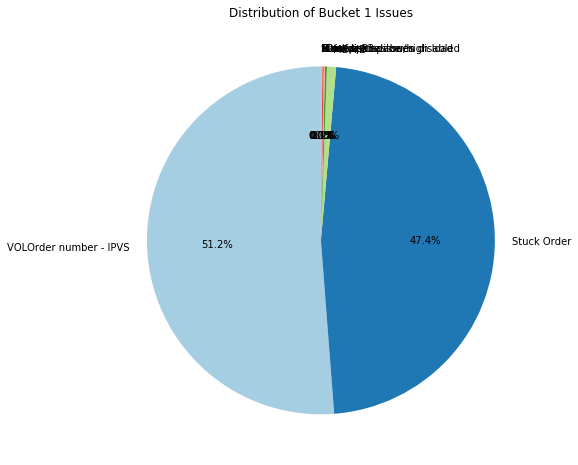

In [11]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(bucket1_counts, labels=bucket1_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Bucket 1 Issues')
plt.show()

In [12]:
data['Bucket 2'].value_counts()

VOLOrder number - IPVS                                            8158
Order - Open/to complete                                          2066
Order - Stuck issues                                              1606
Order - Cancel issues                                             1220
Order - Passed CAD                                                1156
Order - Stuck order                                                275
Order - To be closed                                               158
Order - Renumber / Number port issues                              114
Order - Provisioning issues                                        112
Order - Submitted for 24 hours                                      46
Connectivity problem                                                39
MDAID - ApigeePartner_Awaiting_Initial_Response                     32
Order - Unable to submit                                            24
MDAID - IIPMAL EE order fail                                        22
Low di

In [13]:
bucket2_counts = data['Bucket 2'].value_counts()

# Create a DataFrame with value counts and overall percentage
bucket2_df = pd.DataFrame({'Count': bucket2_counts, 'Percentage': (bucket2_counts / len(data)) * 100})

# Display the DataFrame
bucket2_df

,Count,Percentage
VOLOrder number - IPVS,8158,50.169116
Order - Open/to complete,2066,12.705246
Order - Stuck issues,1606,9.876391
Order - Cancel issues,1220,7.502614
Order - Passed CAD,1156,7.109034
Order - Stuck order,275,1.691163
Order - To be closed,158,0.971650
Order - Renumber / Number port issues,114,0.701064
Order - Provisioning issues,112,0.688765
Order - Submitted for 24 hours,46,0.282885


In [14]:
# Calculate KPIs
total_issues = data[' 23,919 '].sum()
stuck_orders = data[data['Bucket 1'] == 'Stuck Order'][' 23,919 '].sum()
interface_disabled = data[data['Bucket 2'] == 'Interface has been disabled'][' 23,919 '].sum()
disk_space_issues = data[data['Bucket 2'] == 'Disk space issues'][' 23,919 '].sum()
passed_cad_issues = data[data['Bucket 2'] == 'Order - Passed CAD'][' 23,919 '].sum()
unexpected_low_load = data[data['Bucket 2'] == 'Unexpected low/high load'][' 23,919 '].sum()
p3_cases_raised = data[data['Bucket 2'] == 'Raise a P3'][' 23,919 '].sum()

# Display KPIs
print(f"Total Number of Issues: {total_issues}")
print(f"Number of Stuck Orders: {stuck_orders}")
print(f"Number of Interface Disabled Issues: {interface_disabled}")
print(f"Number of Disk Space Issues: {disk_space_issues}")
print(f"Number of Passed CAD Issues: {passed_cad_issues}")
print(f"Number of Unexpected Low Load Issues: {unexpected_low_load}")
print(f"Number of P3 Cases Raised: {p3_cases_raised}")

Total Number of Issues: 23919
Number of Stuck Orders: 12091
Number of Interface Disabled Issues: 473
Number of Disk Space Issues: 539
Number of Passed CAD Issues: 2094
Number of Unexpected Low Load Issues: 0
Number of P3 Cases Raised: 0


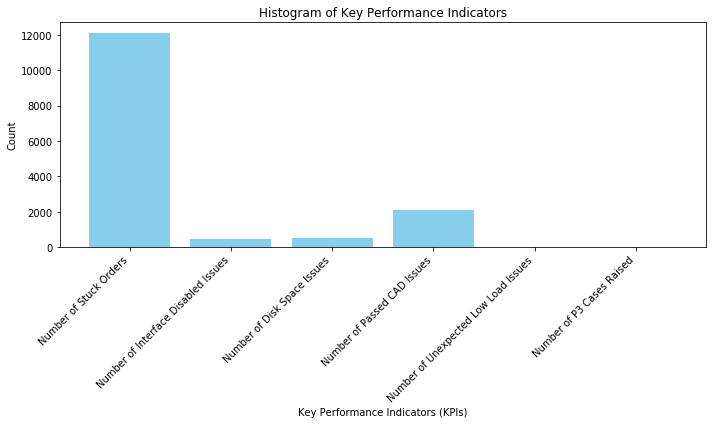

In [15]:
import matplotlib.pyplot as plt

# KPI data
kpi_labels = ['Number of Stuck Orders', 'Number of Interface Disabled Issues', 'Number of Disk Space Issues', 'Number of Passed CAD Issues', 'Number of Unexpected Low Load Issues', 'Number of P3 Cases Raised']
kpi_values = [12091, 473, 539, 2094, 0, 0]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(kpi_labels, kpi_values, color='skyblue')
plt.xlabel('Key Performance Indicators (KPIs)')
plt.ylabel('Count')
plt.title('Histogram of Key Performance Indicators')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()